going to cite www.theringer.com/2016/11/7/16077036/nba-big-man-hybrids-karl-anthony-towns-myles-turner-254a304647c9


In [102]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D


url = "http://data.nba.net/10s/prod/v1/2016/players.json"

file = 'player_data.csv'
filetwo = 'Seasons_Stats.csv'

In [103]:
nba_df = pd.read_csv(file)
nbatwo_df = pd.read_csv(filetwo)
nbatwo_df["Pos"].unique()

array(['G-F', 'SG', 'SF', 'F', 'G', 'F-C', 'PG', 'F-G', 'C', 'PF', 'C-F',
       nan, 'PF-C', 'SF-SG', 'C-PF', 'SG-SF', 'PF-SF', 'SF-PF', 'SG-PG',
       'SF-PG', 'C-SF', 'PG-SG', 'PG-SF', 'SG-PF'], dtype=object)

In [104]:
nbatwo_df.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [105]:
nbatwoedit_df = nbatwo_df[["Year", "Player", "Pos", "Age", "Tm", "G", "GS", "MP", "PER", "TS%", "3PAr", "FTr", "ORB%", "DRB%", "TRB%",
                           "AST%", "STL%", "BLK%", "TOV%", "USG%", "OWS", "DWS", "WS", "WS/48", "OBPM", "DBPM", "BPM", "VORP", "FG", 
                           "FGA", "FG%", "3P", "3PA", "3P%", "2P", "2PA", "2P%", "eFG%", "FT", "FTA", "FT%", "ORB", "DRB", "TRB", 
                           "AST", "STL", "BLK", "TOV", "PF", "PTS"]]

In [106]:
#breaking data down into positions
only_bigmen = nbatwoedit_df.loc[(nbatwoedit_df["Pos"] =="C") | (nbatwoedit_df["Pos"] == "F-C") | (nbatwoedit_df["Pos"] == "C-F") | 
                               (nbatwoedit_df["Pos"] == "C-PF") | (nbatwoedit_df["Pos"] =="C-SF") | (nbatwoedit_df["Pos"] == "PF-C")|
                               (nbatwoedit_df["Pos"] == "PF-SF") | (nbatwoedit_df["Pos"]=="SF") | (nbatwoedit_df["Pos"]=="F")|
                               (nbatwoedit_df["Pos"] =="PF") | (nbatwoedit_df["Pos"]=="SF-PF")]
only_shorties = nbatwoedit_df.loc[(nbatwoedit_df["Pos"] =="SG") | (nbatwoedit_df["Pos"] == "G") | (nbatwoedit_df["Pos"] == "PG") | 
                               (nbatwoedit_df["Pos"] == "SG-SF") | (nbatwoedit_df["Pos"] =="PG-SF") | (nbatwoedit_df["Pos"] == "SG-PG")|
                               (nbatwoedit_df["Pos"] == "G-F") | (nbatwoedit_df["Pos"]=="F-G") | (nbatwoedit_df["Pos"]=="SF-SG")|
                               (nbatwoedit_df["Pos"]=="SF-PG") | (nbatwoedit_df["Pos"]=="PG-SG") | (nbatwoedit_df["Pos"]=="SG-PF")]

                               


In [107]:
#only_shorties["Pos"].nunique()
#verifies that the correct amount of positions is being captured

In [108]:
#looked at the dataset and found that if a player was traded, all data was involved, both teams and total.  To fix, 
#I searched for Total and then made a new column of data for all teams but total
#only_bigmen["Tm"].unique()
#only_shorties["Tm"].unique()

In [109]:
only_bigmen = only_bigmen.loc[(only_bigmen["Tm"] != "TOT")]
#only_bigmen["Tm"].unique()
only_shorties = only_shorties.loc[(only_shorties["Tm"] != "TOT")]
#only_shorties["Tm"].unique()
#this also reduces the unique positions, which is fine since TOT was an overlapping variable

In [110]:
#only_shorties["Pos"].nunique()
#only_bigmen["Pos"].unique()
#this verifies that unique positions are captured

In [111]:
bigmenclean_df = only_bigmen.dropna(how="any")
shortiesclean_df= only_shorties.dropna(how="any")
#This cleans up the data frames and eliminates NAN and Zeros from data

In [112]:
#bigmenclean_df["Player"].count()
#shortiesclean_df["Player"].count()
Total_count = bigmenclean_df["Player"].nunique() + shortiesclean_df["Player"].nunique()
Total_count
#represents the total amount of unique players that are in the dataset

2551

In [113]:
playing_year = [ "1980-1984", "1985-1989", "1990-1994","1995-1999","2000-2004","2005-2009", "2010-2014", "2015+"] 
bins = [ 1979, 1984, 1989, 1994, 1999, 2004,2009,2014, 2019]
bigmenclean_df["Year Group"] = pd.cut(bigmenclean_df["Year"], bins, labels = playing_year)
shortiesclean_df["Year Group"] = pd.cut(shortiesclean_df["Year"], bins, labels = playing_year)
#shortiesclean_df
#binned the players into 5 year buckets

C:\Users\Trading\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Trading\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [114]:
bigmenyeargroup_df = bigmenclean_df.groupby("Year Group")
shortiesyeargroup_df = shortiesclean_df.groupby("Year Group")
#shortiesyeargroup_df.count()
#bigmenyeargroup_df.count()

In [115]:
#created different dataframe views
bigmenmeans = bigmenyeargroup_df.mean()
shortiesmeans = shortiesyeargroup_df.mean()
bigmentotal = bigmenyeargroup_df.sum()
shortiestotal = shortiesyeargroup_df.sum()


In [116]:
#created PER viewable
shortyPER = shortiesmeans["PER"]
bigmenPER = bigmenmeans["PER"]


In [117]:
#created points variables
shortypts = shortiestotal["PTS"]
bigmenpts = bigmentotal["PTS"]
totalpts = shortypts + bigmenpts

In [118]:
#created various variables to measure shorties statistics
shorty_scoring = shortiesmeans["PTS"]
shorty_graph = shorty_scoring
shorty_age = shortiesmeans["Age"]
shorty_fgpercent = shortiesmeans["FG%"]*100
shorty_assist = shortiesmeans["AST"]
shorty_assistpercent = shortiesmeans["AST%"]
shorty_games = shortiesmeans["G"]
shorty_minutes =shortiesmeans["MP"]
shorty_twos = shortiesmeans["2PA"]
shorty_threes = shortiesmeans["3PA"]
shorty_twopercent = shortiesmeans["2P%"]
shorty_threepercent = shortiesmeans["3P%"]
shorty_blocks = shortiesmeans["BLK"]
shorty_offensivereb = shortiesmeans["ORB"]


In [119]:
#created various variables to measure bigmen statistics 
bigmen_scoring = bigmenmeans["PTS"]
bigmen_graph = bigmen_scoring
bigmen_age = bigmenmeans["Age"]
bigmen_fgpercent = bigmenmeans["FG%"]*100
bigmen_assist = bigmenmeans["AST"]
bigmen_assistpercent = bigmenmeans["AST%"]
bigmen_twopercent = bigmenmeans["2P%"]
bigmen_threepercent = bigmenmeans["3P%"]
bigmen_games = bigmenmeans["G"]
bigmen_minutes =bigmenmeans["MP"]
bigmen_twos = bigmenmeans["2PA"]
bigmen_threes = bigmenmeans["3PA"]
bigmen_blocks = bigmenmeans["BLK"]
bigmen_offensivereb = bigmenmeans["ORB"]


In [120]:
#shorty_fgpercent
#bigmen_assistpercent
bigmen_threenew = bigmentotal["3PA"]
bigmen_twonew = bigmentotal["2PA"]
shorty_threenew = shortiestotal["3PA"]
shorty_twonew = shortiestotal["2PA"]

#shorty_offensivereb
#TESTED VARIOUS VARIABLES TO MAKE SURE THEY WERE PRINTING PROPERLY

In [121]:
x_axis1 = bigmen_scoring.index.tolist()
x_axis2 = shorty_scoring.index.tolist()
x_axis3 = shorty_fgpercent.index.tolist()
x_axis4 = bigmen_fgpercent.index.tolist()
x_axis5 = shorty_assist.index.tolist()
x_axis6 = bigmen_assist.index.tolist()
x_axis7 = shorty_assistpercent.index.tolist()
x_axis8 = bigmen_assistpercent.index.tolist()
x_axis9 = totalpts.index.tolist()
x_axis10 = bigmenpts.index.tolist()
x_axis11 = shortypts.index.tolist()
x_axis12 = shortyPER.index.tolist()
x_axis13 = bigmenPER.index.tolist()

print(x_axis1)
print(x_axis13)
#used multiple x_axis but they were all consistent, printed two of them to compare

['1980-1984', '1985-1989', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015+']
['1980-1984', '1985-1989', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015+']


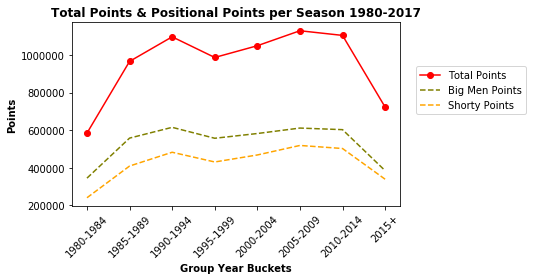

In [122]:
#made graph to show positional total scoring and then scoring by position designation
fig, ax1 = plt.subplots()

lns9 = ax1.plot(x_axis9,totalpts, marker ='o',color="red", label = "Total Points" )
lns10 = ax1.plot(x_axis10, bigmenpts,marker = '', color = "olive", linestyle = 'dashed', label = "Big Men Points")
lns11 = ax1.plot(x_axis11, shortypts, color = "orange", linestyle = 'dashed',label = "Shorty Points")
ax1.set_ylabel("Points",fontweight= "bold")
ax1.set_xlabel("Group Year Buckets",fontweight= "bold")
ax1.set_title("Total Points & Positional Points per Season 1980-2017",fontweight= "bold")
plt.xticks(rotation=45)

fig.tight_layout()
lns = lns9+lns10+lns11
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc= (1.05,.5))
plt.savefig("images/TotalPointsJohnMichals.png", dpi = 100, bbox_inches = "tight")
plt.show()

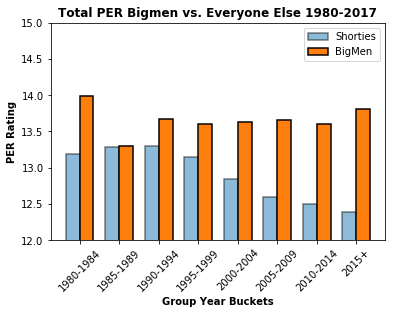

In [123]:
#made bargraph to show PER averages over the years
width = 0.35
n_groups = 8


fig,ax = plt.subplots()
index = np.arange(n_groups)
opacity = 0.5
opacity_two = 1.0

lns12 = ax.bar(index, shortyPER, width, align= 'center', edgecolor = 'black', linewidth = 1.5, alpha = opacity)
lns13 = ax.bar(index + width, bigmenPER, width, align='center', edgecolor = 'black', linewidth = 1.5, alpha = opacity_two)

ax.set_ylabel("PER Rating",fontweight= "bold")
ax.set_xlabel("Group Year Buckets",fontweight= "bold")
ax.set_ylim(12,15)
ax.set_title("Total PER Bigmen vs. Everyone Else 1980-2017",fontweight= "bold")
ax.set_xticks(index + width / 2)
ax.set_xticklabels(('1980-1984', '1985-1989', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015+'))
ax.legend((lns12[0], lns13[0]), ('Shorties', 'BigMen'))
plt.xticks(rotation=45)
plt.savefig("images/bigsvseveryonebarJohnMichals.png", dpi = 100, bbox_inches = "tight")
plt.show()


In [124]:
data=np.array([bigmenPER, shortyPER])
len(data[:,0])


2

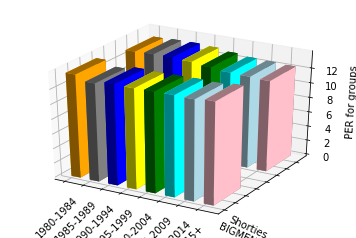

In [125]:
#tried to mess around with a 3dbar chart but ultimately, not looking that great
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

data=np.array([bigmenPER, shortyPER])

row_names = ['BIGMEN', 'Shorties']
column_names = ['1980-1984','1985-1989','1990-1994','1995-1999','2000-2004','2005-2009','2010-2014','2015+']
lx=len(data[0])
ly=len(data[:,0])

xpos = np.arange(0,lx,1)
ypos= np.arange(0,ly,1)
xpos,ypos = np.meshgrid(xpos,ypos)
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(lx*ly)

dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = data.flatten()

cs = ['orange','gray','blue', 'yellow', 'green', 'cyan','lightblue','pink']*ly

ax.bar3d(xpos,ypos,zpos,dx,dy,dz, color = cs)
ax.w_xaxis.set_ticklabels(column_names, rotation=45)
ax.w_yaxis.set_ticklabels(row_names, rotation = 335)

#ax.set_xlabel('Groups')
#ax.set_ylabel('Years')
#ax.set_zlim(10,16) cant get this to work properly
ax.set_zlabel('PER for groups')
plt.savefig('images/Weird3dbarnotworkingfullyJohnMichals.png', dpi=100, bbox_inches ="tight")
plt.show()

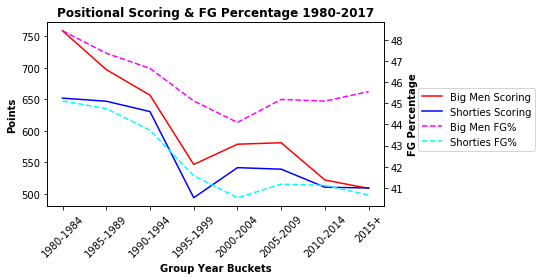

In [126]:
#made graph to show positional scoring by points and field goal percentage
fig, ax1 = plt.subplots()

lns1 = ax1.plot(x_axis1,bigmen_scoring, color="red", label = "Big Men Scoring" )
lns2 = ax1.plot(x_axis2, shorty_scoring, color = "blue", label = "Shorties Scoring")
ax1.set_ylabel("Points",fontweight= "bold")
ax1.set_xlabel("Group Year Buckets",fontweight= "bold")
ax1.set_title("Positional Scoring & FG Percentage 1980-2017",fontweight= "bold")
plt.xticks(rotation=45)

ax2 = ax1.twinx()

lns3 = ax2.plot(x_axis1, bigmen_fgpercent, color="magenta", linestyle = 'dashed', label = "Big Men FG%")
lns4 = ax2.plot(x_axis2, shorty_fgpercent, color="cyan", linestyle = 'dashed', label ="Shorties FG%")
ax2.set_ylabel("FG Percentage",fontweight= "bold")


fig.tight_layout()
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc= (1.1,.3))
plt.savefig("images/ScoringFGPercentageJohnMichals.png", dpi = 100, bbox_inches = "tight")
plt.show()



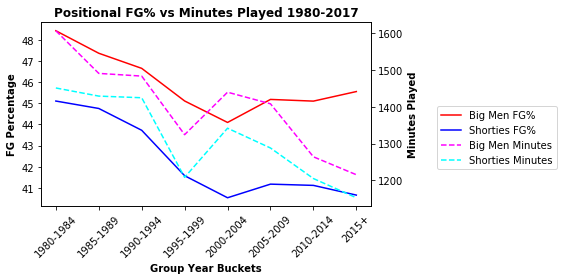

In [127]:
#made graph to show positional Field Goal Percentage and Minutes Played
fig, ax1 = plt.subplots()

lns14 = ax1.plot(x_axis1,bigmen_fgpercent, color="red", label = "Big Men FG%" )
lns15 = ax1.plot(x_axis2, shorty_fgpercent, color = "blue", label = "Shorties FG%")
ax1.set_ylabel("FG Percentage",fontweight= "bold")
ax1.set_xlabel("Group Year Buckets",fontweight= "bold")
ax1.set_title("Positional FG% vs Minutes Played 1980-2017",fontweight= "bold")
plt.xticks(rotation=45)

ax2 = ax1.twinx()

lns16 = ax2.plot(x_axis1, bigmen_minutes, color="magenta",linestyle = 'dashed', label = "Big Men Minutes")
lns17 = ax2.plot(x_axis2, shorty_minutes, color="cyan",linestyle = 'dashed', label ="Shorties Minutes")
ax2.set_ylabel("Minutes Played",fontweight= "bold")


fig.tight_layout()
lns = lns14+lns15+lns16+lns17
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc= (1.2,.2))
plt.savefig("images/PositionalFG%JohnMichals.png", dpi = 100, bbox_inches = "tight")
plt.show()

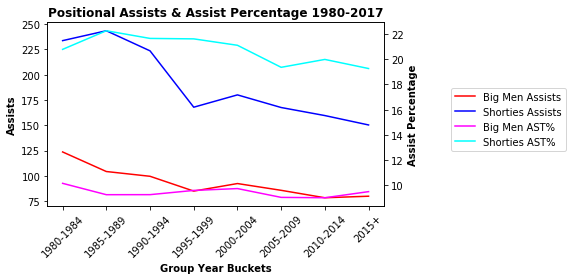

In [128]:
#made graph to show positional assists and assist percentage
fig, ax1 = plt.subplots()

lns5 = ax1.plot(x_axis6,bigmen_assist, color="red", label = "Big Men Assists" )
lns6 = ax1.plot(x_axis5, shorty_assist, color = "blue", label = "Shorties Assists")
ax1.set_ylabel("Assists",fontweight= "bold")
ax1.set_xlabel("Group Year Buckets",fontweight= "bold")
ax1.set_title("Positional Assists & Assist Percentage 1980-2017",fontweight= "bold")
plt.xticks(rotation=45)
ax2 = ax1.twinx()

lns7 = ax2.plot(x_axis8, bigmen_assistpercent, color="magenta", label = "Big Men AST%")
lns8 = ax2.plot(x_axis7, shorty_assistpercent, color="cyan", label ="Shorties AST%")
ax2.set_ylabel("Assist Percentage",fontweight= "bold")


fig.tight_layout()
lns = lns5+lns6+lns7+lns8
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs,loc= (1.2,.3))
plt.savefig("images/Positional Assists & Assist PercentageJohnMichals.png", dpi = 100, bbox_inches = "tight")
plt.show()

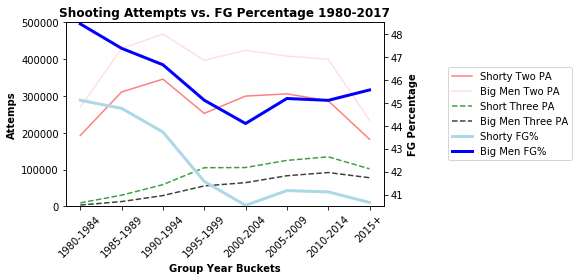

In [129]:
#made graph to show shorties pts and then 2 and 3 point attemps
fig, ax1 = plt.subplots()

lns18 = ax1.plot(x_axis6,shorty_twonew, color="red", alpha = .5, label = "Shorty Two PA" )
lns19 = ax1.plot(x_axis8,bigmen_twonew, color="pink", alpha = .5, label = "Big Men Two PA")
lns20 = ax1.plot(x_axis5, shorty_threenew, color = "green", linestyle = 'dashed', alpha = .75, label = "Short Three PA")
lns21 = ax1.plot(x_axis7, bigmen_threenew, color="black",linestyle = 'dashed',alpha = .75, label ="Big Men Three PA")
ax1.set_ylabel("Attemps",fontweight= "bold")
ax1.set_ylim(1000,500000)
ax1.set_xlabel("Group Year Buckets",fontweight= "bold")
ax1.set_title("Shooting Attempts vs. FG Percentage 1980-2017",fontweight= "bold")
plt.xticks(rotation=45)
ax2 = ax1.twinx()

lns22 = ax2.plot(x_axis8,shorty_fgpercent, color="lightblue", linewidth = 3, label = "Shorty FG%")
lns23 = ax2.plot(x_axis7, bigmen_fgpercent, color="blue", linewidth = 3, label ="Big Men FG%")
ax2.set_ylabel("FG Percentage",fontweight= "bold")
ax2.set_ylim(40.5,48.5)


fig.tight_layout()
lns = lns18+lns19+lns20+lns21+lns22+lns23
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs,loc= (1.2,.25))
plt.savefig("images/ShootingAttemptsvsFGJohnMichals.png", dpi = 100, bbox_inches = "tight")
plt.show()

In [130]:
#Added in the player data file, nba_df
nba_df.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [131]:
#NEXT FEW LINES OF CODE DROP NAs, CHANGE HEIGHT TO TOTAL INCHES, CREATE CAREER LENGTH COLUMN
nba_df = nba_df.dropna(how="any")

In [132]:
nba_df[["height","inches"]]=nba_df["height"].str.split('-',expand=True)

In [133]:
nba_df["height"] = pd.to_numeric(nba_df["height"])
nba_df["inches"] = pd.to_numeric(nba_df["inches"])

In [134]:
nba_df['height'] = nba_df['height'].apply(lambda x: x*12)
nba_df["total height"] = nba_df["height"] + nba_df["inches"]
nba_df["Career Length"]= nba_df["year_end"] - nba_df["year_start"]

In [135]:
nba_df = nba_df[["name", "Career Length", 'position', 'total height', 'weight', 'birth_date', 'college']]
nba_df.head()

,name,Career Length,position,total height,weight,birth_date,college
0,Alaa Abdelnaby,4,F-C,82,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,9,C-F,81,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,19,C,86,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,10,G,73,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,5,F,78,223.0,"November 3, 1974",San Jose State University


In [136]:
#check position
nba_df["position"].unique()

array(['F-C', 'C-F', 'C', 'G', 'F', 'F-G', 'G-F'], dtype=object)

In [137]:
#created a onlybigs variable
only_bigs = nba_df.loc[(nba_df["position"] == "C") | (nba_df["position"] =="C-F") |(nba_df["position"] =="F-C"),:]
other_than_bigs = nba_df.loc[(nba_df["position"] == "G") | (nba_df["position"] =="F-G") |(nba_df["position"] =="G-F")
                             |(nba_df["position"] =="F"),:]
other_than_bigs.head()

,name,Career Length,position,total height,weight,birth_date,college
3,Mahmoud Abdul-Rauf,10,G,73,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,5,F,78,223.0,"November 3, 1974",San Jose State University
5,Shareef Abdur-Rahim,11,F,81,225.0,"December 11, 1976",University of California
6,Tom Abernethy,4,F,79,220.0,"May 6, 1954",Indiana University
7,Forest Able,0,G,75,180.0,"July 27, 1932",Western Kentucky University


In [138]:
#created variables for regression analysis
player_height = nba_df["total height"]
career_length = nba_df["Career Length"]


In [139]:
#runs regression to determine if career length is affected by a players height
(slope, intercept, _, _, _) = stats.linregress(player_height, career_length) 
fit = slope* player_height + intercept
#print(fit)

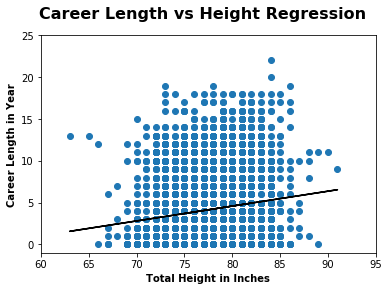

In [140]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Career Length vs Height Regression", fontsize=16, fontweight="bold")

ax.set_xlim(60,95)
ax.set_ylim(-1,25)

ax.set_xlabel("Total Height in Inches", fontweight= "bold")
ax.set_ylabel("Career Length in Year",fontweight= "bold")

ax.plot(player_height, career_length, linewidth=0, marker='o')
ax.plot(player_height, fit, 'black')
plt.savefig("images/CareerLengthRegression.png", dpi = 100, bbox_inches = "tight")
plt.show()

In [141]:
player_height = 84
print("The expected career length for a Center with the height of " +  str(player_height) + " inches is " +
      str(slope * player_height + intercept) + ".")

The expected career length for a Center with the height of 84 inches is 5.299141601976114.


In [142]:
#Renamed for the merge, a new data frame with name not player
bigmencleanformerge_df = bigmenclean_df.rename(columns={"Player": "name"})
notbigmencleanformerge_df = shortiesclean_df.rename(columns={"Player": "name"})
notbigmencleanformerge_df.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year Group
5730,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,0.574,...,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0,1980-1984
5786,1980.0,Don Chaney,SG,33.0,BOS,60.0,0.0,523.0,7.8,0.402,...,31.0,42.0,73.0,38.0,31.0,11.0,33.0,80.0,167.0,1980-1984
5835,1980.0,Chris Ford,SG,31.0,BOS,73.0,73.0,2115.0,13.0,0.537,...,77.0,104.0,181.0,215.0,111.0,27.0,105.0,178.0,816.0,1980-1984
5867,1980.0,Gerald Henderson,PG,24.0,BOS,76.0,2.0,1061.0,12.7,0.539,...,37.0,46.0,83.0,147.0,45.0,15.0,109.0,96.0,473.0,1980-1984
5949,1980.0,Pete Maravich*,SG,32.0,BOS,26.0,4.0,442.0,15.6,0.547,...,10.0,28.0,38.0,29.0,9.0,2.0,37.0,49.0,299.0,1980-1984


In [143]:
#This is fine, but height is not the only factor in terms of a career, we need to dig a little deeper
nba_merge = pd.merge(bigmencleanformerge_df, only_bigs, on="name", how="inner")
nba_otherposmerge = pd.merge(notbigmencleanformerge_df, other_than_bigs, on="name", how="inner")
nba_otherposmerge.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,TOV,PF,PTS,Year Group,Career Length,position,total height,weight,birth_date,college
0,1980.0,Don Chaney,SG,33.0,BOS,60.0,0.0,523.0,7.8,0.402,...,33.0,80.0,167.0,1980-1984,11,G,77,210.0,"March 22, 1946",University of Houston
1,1980.0,Chris Ford,SG,31.0,BOS,73.0,73.0,2115.0,13.0,0.537,...,105.0,178.0,816.0,1980-1984,9,G-F,77,190.0,"January 11, 1949",Villanova University
2,1981.0,Chris Ford,SG,32.0,BOS,82.0,75.0,2723.0,8.8,0.488,...,127.0,212.0,728.0,1980-1984,9,G-F,77,190.0,"January 11, 1949",Villanova University
3,1982.0,Chris Ford,SG,33.0,BOS,76.0,53.0,1591.0,7.8,0.458,...,52.0,143.0,435.0,1980-1984,9,G-F,77,190.0,"January 11, 1949",Villanova University
4,1980.0,Gerald Henderson,PG,24.0,BOS,76.0,2.0,1061.0,12.7,0.539,...,109.0,96.0,473.0,1980-1984,12,G,74,175.0,"January 16, 1956",Virginia Commonwealth University


In [144]:
#THIS WAS DONE SO THAT I COULD SORT THE TOP PERS AND THEN USE THEM IN A BUBBLE
centerssortedPER = nba_merge.sort_values('PER', ascending = False)
otherssortedPER = nba_otherposmerge.sort_values('PER', ascending = False)
#OBPT30 = onlybigsPERtopthirty["PER"].head(30)

otherssortedPER.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,TOV,PF,PTS,Year Group,Career Length,position,total height,weight,birth_date,college
2523,1995.0,Darrell Armstrong,PG,26.0,ORL,3.0,0.0,8.0,40.2,0.563,...,1.0,3.0,10.0,1995-1999,13,G,72,170.0,"June 22, 1968",Fayetteville State University
2215,1999.0,John Crotty,PG,29.0,POR,3.0,0.0,19.0,37.0,0.644,...,0.0,1.0,12.0,1995-1999,10,G,73,185.0,"July 15, 1969",University of Virginia
4067,2004.0,Chris Jefferies,SG,23.0,TOR,2.0,0.0,8.0,33.3,0.621,...,1.0,0.0,8.0,2000-2004,1,G-F,80,225.0,"February 13, 1980","California State University, Fresno"
2538,1995.0,Elmer Bennett,PG,24.0,CLE,4.0,0.0,18.0,32.5,0.588,...,3.0,3.0,15.0,1995-1999,2,G,72,170.0,"February 13, 1970",University of Notre Dame
2524,1996.0,Darrell Armstrong,PG,27.0,ORL,13.0,0.0,41.0,32.4,0.622,...,6.0,4.0,42.0,1995-1999,13,G,72,170.0,"June 22, 1968",Fayetteville State University


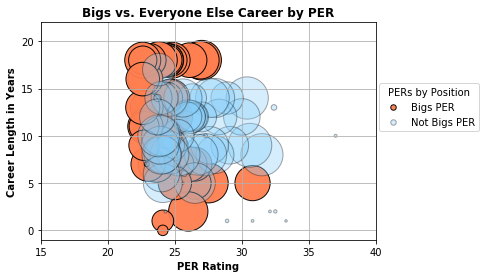

In [145]:
colors = ["coral", "lightskyblue", "gold"]
plt.scatter(centerssortedPER["PER"].head(50), centerssortedPER["Career Length"].head(50), marker="o", c="coral", edgecolors = "black", s = centerssortedPER["PTS"]*.75, label = "Bigs PER", alpha = 0.95)
plt.scatter(otherssortedPER["PER"].head(50), otherssortedPER["Career Length"].head(50), marker="o", c="lightskyblue", edgecolors = "black", s = otherssortedPER["PTS"]*.75, label = "Not Bigs PER", alpha = 0.35)
plt.grid(True)
plt.xlim(15,40)
plt.ylim(-1,22)
plt.ylabel("Career Length in Years", fontweight = "bold")
plt.xlabel("PER Rating", fontweight = "bold")
plt.title("Bigs vs. Everyone Else Career by PER", fontweight = "bold")
lgnd = plt.legend(loc =(1.01, .5),title = "PERs by Position")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
plt.savefig("images/BubbleplotPERtop50.png", dpi = 100, bbox_inches = "tight")
plt.show()

In [146]:
nba_newmerge= nba_merge.groupby("name")
nba_newotherposmerge =nba_otherposmerge.groupby("name")

In [147]:
#nba_newmerge.mean()
nba_newotherposmerge["PER"].mean().head()

name
A.J. English    11.550000
A.J. Guyton     11.050000
A.J. Price      11.871429
A.J. Wynder      7.600000
Aaron Brooks    12.900000
Name: PER, dtype: float64

In [148]:
#made new variable for the PER, will make scatter plot
onlybigsPER = nba_newmerge["PER"].mean()
onlybigsPTS = nba_newmerge["PTS"].mean()
onlybigscareer = nba_newmerge["Career Length"].count()
onlybigsage = nba_newmerge["Age"].mean() 
notbigsPER = nba_newotherposmerge["PER"].mean()
notbigsPTS = nba_newotherposmerge["PTS"].mean()
notbigscareer = nba_newotherposmerge["Career Length"].count()
notbigsage = nba_newotherposmerge["Age"].mean()
onlybigsPERtoptwenty = nba_newmerge["PER"].mean().head(20)


In [149]:
#SORTED WITH THE APPLY METHOD, KEPT THE APPLY IN PLACE BECAUSE THE CODE IS GOOD.  DIDNT PRODUCE THE RESULT I WANTED THOUGH
#onlybigsPERtoptwenty = nba_newmerge.apply(pd.DataFrame.sort_values, 'PER', ascending = False)
#onlybigsPERtoptwenty.head(5)

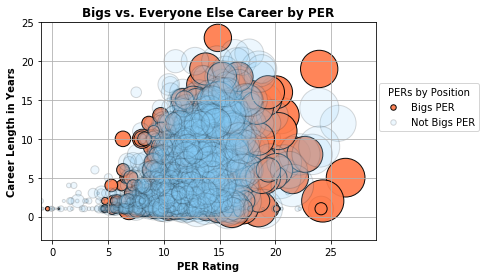

In [150]:
colors = ["coral", "lightskyblue", "gold"]
plt.scatter(onlybigsPER, onlybigscareer, marker="o", c="coral", edgecolors = "black", s = onlybigsPTS, label = "Bigs PER", alpha = 0.95)
plt.scatter(notbigsPER, notbigscareer, marker="o", c="lightskyblue", edgecolors = "black", s = notbigsPTS, label = "Not Bigs PER", alpha = 0.15)
plt.grid(True)
plt.xlim(-1,29)
plt.ylim(-3,25)
plt.ylabel("Career Length in Years", fontweight = "bold")
plt.xlabel("PER Rating", fontweight = "bold")
plt.title("Bigs vs. Everyone Else Career by PER", fontweight = "bold")
lgnd = plt.legend(loc =(1.01, .5),title = "PERs by Position")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
plt.savefig("images/BubbleplotPER.png", dpi = 100, bbox_inches = "tight")
plt.show()